(1067, 1600, 3)
255 0


(-0.5, 1599.5, 1066.5, -0.5)

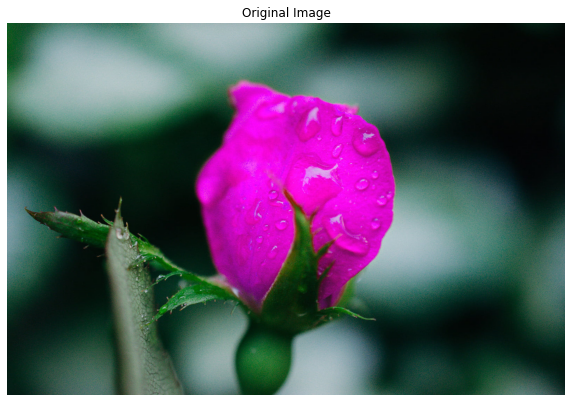

In [1]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import cluster 


path = './RoseFlower.jpeg'
im = mimg.imread(path)
print(im.shape)
print(im.max(),im.min())
# display the image 
plt.figure(1,figsize=(10,10))
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')


(1067, 1600)
(1067, 1600)
(1067, 1600)


(-0.5, 1599.5, 1066.5, -0.5)

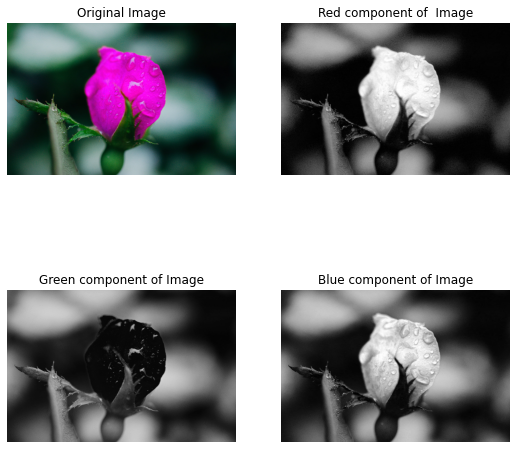

In [4]:
# lets seperate out the channels of the image 
im_R = im[:,:,0] # this will have red components 
im_G = im[:,:,1] # this will have green components 
im_B = im[:,:,2] # this will have blue components 

print(im_R.shape)
print(im_G.shape)
print(im_B.shape)

plt.figure(2,figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(im_R,cmap='gray')
plt.title('Red component of  Image')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(im_G,cmap='gray')
plt.title('Green component of Image')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(im_B,cmap='gray')
plt.title('Blue component of Image')
plt.axis('off')


(-0.5, 1599.5, 1066.5, -0.5)

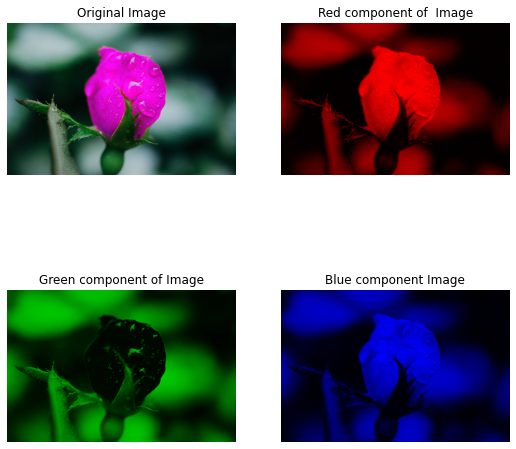

In [5]:
IM_R = np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')
IM_G = np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')
IM_B = np.zeros((im.shape[0],im.shape[1],im.shape[2]),dtype='uint8')


IM_R[:,:,0]=im_R

# insert the green component page
IM_G[:,:,1]=im_G

# insert the blue compoenent page
IM_B[:,:,2]=im_B


plt.figure(2,figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(IM_R)
plt.title('Red component of  Image')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(IM_G)
plt.title('Green component of Image')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(IM_B)
plt.title('Blue component Image')
plt.axis('off')


(1067, 1600) (1707200, 1)


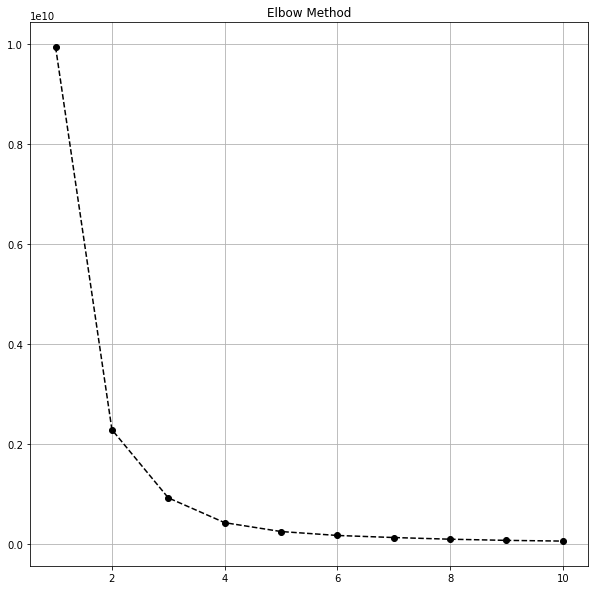

In [8]:
red_comp = im_R.copy()

feat = red_comp.reshape(-1,1)# all pixels will be shited in rows considered as number of sampels for kmeans 
print(red_comp.shape,feat.shape)

# apply the elbow method on using kmeans 

K = []
dist= []

for i in range(1,11):
    kmModel = cluster.KMeans(n_clusters=i,random_state=5)
    kmModel = kmModel.fit(feat)
    dist.append(kmModel.inertia_)
    K.append(i)

plt.figure(2,figsize=(10,10))
plt.plot(K,dist,'--ko')
plt.title('Elbow Method')
plt.grid('on')


In [9]:
# from the elbow methods cluster number 4 is finalised 

kmModel = cluster.KMeans(n_clusters=4,random_state=5)
kmModel = kmModel.fit(feat)

label= kmModel.labels_
print(label)
print(np.unique(label))


[0 0 0 ... 0 0 0]
[0 1 2 3]


[0 1 2 3]


(-0.5, 1599.5, 1066.5, -0.5)

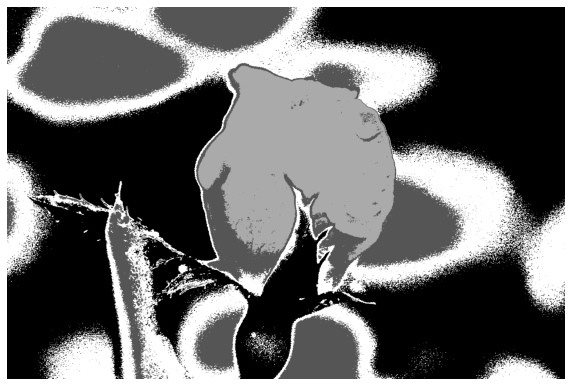

In [10]:
print(np.unique(label))
label_image = label.reshape(im.shape[0],im.shape[1])
plt.figure(4,figsize=(10,10))
plt.imshow(label_image,cmap='gray')
plt.axis('off')


(-0.5, 1599.5, 1066.5, -0.5)

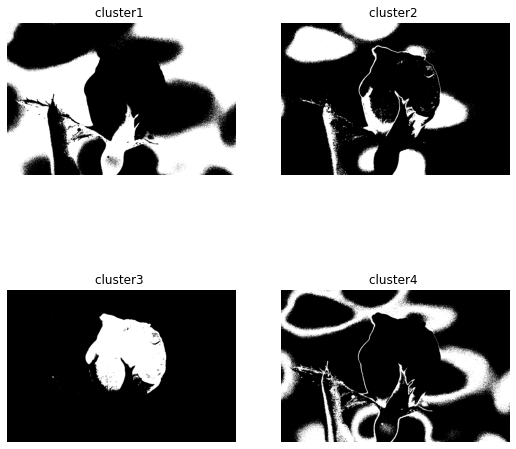

In [11]:
bin_img1 = np.zeros((im.shape[0],im.shape[1]),dtype='uint8')
bin_img2 = np.zeros((im.shape[0],im.shape[1]),dtype='uint8')
bin_img3 = np.zeros((im.shape[0],im.shape[1]),dtype='uint8')
bin_img4 = np.zeros((im.shape[0],im.shape[1]),dtype='uint8')

ind1 = label_image==0
bin_img1[ind1]=1

ind2 = label_image==1
bin_img2[ind2]=1

ind3 = label_image==2
bin_img3[ind3]=1

ind4 = label_image==3
bin_img4[ind4]=1



plt.figure(2,figsize=(9,9))
plt.subplot(2,2,1)
plt.imshow(bin_img1,cmap='gray')
plt.title('cluster1 ')
plt.axis('off')
plt.subplot(2,2,2)
plt.imshow(bin_img2,cmap='gray')
plt.title('cluster2 ')
plt.axis('off')
plt.subplot(2,2,3)
plt.imshow(bin_img3,cmap='gray')
plt.title('cluster3 ')
plt.axis('off')
plt.subplot(2,2,4)
plt.imshow(bin_img4,cmap='gray')
plt.title('cluster4 ')
plt.axis('off')


Text(0.5, 1.0, 'final segmented flower ')

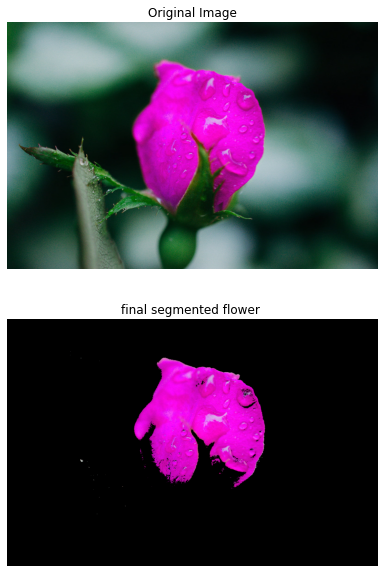

In [12]:
# cluster 3 is having this ROI - Region of Interest
final_result = im.copy()

ind_0 = bin_img3==0

fin_R = final_result[:,:,0]
fin_G = final_result[:,:,1]
fin_B = final_result[:,:,2]

fin_R[ind_0]=0
fin_G[ind_0]=0
fin_B[ind_0]=0

final_result[:,:,0]= fin_R
final_result[:,:,1]= fin_G
final_result[:,:,2]= fin_B

plt.figure(3,(10,10))
plt.subplot(2,1,1)
plt.imshow(im)
plt.axis('off')
plt.title('Original Image')

plt.subplot(2,1,2)
plt.imshow(final_result)
plt.axis('off')
plt.title('final segmented flower ')
